In [5]:
import pandas as pd
import numpy as np
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
sys.path.append(str(PROJECT_ROOT))

df = pd.read_csv(f"{PROJECT_ROOT}/data/clean/spotify_clean.csv")
df.head()

,artists,name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre,artist_primary
0,sam smith;kim petras,unholy,100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.2660,0.238,131.121,4,pop,sam smith
1,bizarrap;quevedo,"quevedo: bzrp music sessions, vol. 52",99,198937,False,0.621,0.782,2,-5.548,1,0.0440,0.01250,0.033000,0.2300,0.550,128.033,4,hip-hop,bizarrap
2,manuel turizo,la bachata,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.2180,0.850,124.980,4,reggaeton,manuel turizo
3,david guetta;bebe rexha,i'm good,98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,4,edm,david guetta
4,bad bunny;chencho corleone,me porto bonito,97,178567,True,0.911,0.712,1,-5.105,0,0.0817,0.09010,0.000027,0.0933,0.425,92.005,4,reggae,bad bunny


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

audio_clust = df[
    ["danceability", 
     "energy",
     "loudness", 
     "speechiness",
     "acousticness",
     "instrumentalness",
     "liveness",
     "valence",
     "tempo"]
]

audio_clust.head()


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.714,0.472,-7.375,0.0864,0.01300,0.000005,0.2660,0.238,131.121
1,0.621,0.782,-5.548,0.0440,0.01250,0.033000,0.2300,0.550,128.033
2,0.835,0.679,-5.329,0.0364,0.58300,0.000002,0.2180,0.850,124.980
3,0.561,0.965,-3.673,0.0343,0.00383,0.000007,0.3710,0.304,128.040
4,0.911,0.712,-5.105,0.0817,0.09010,0.000027,0.0933,0.425,92.005


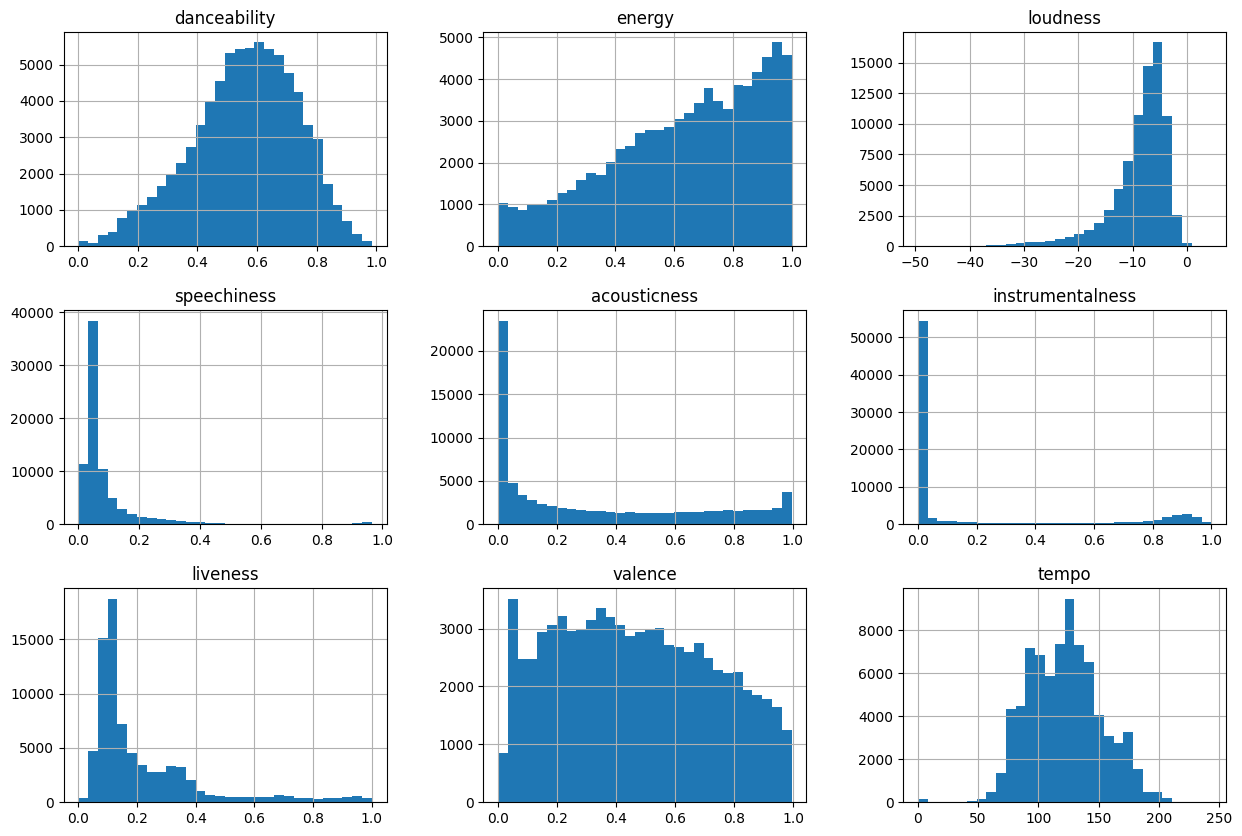

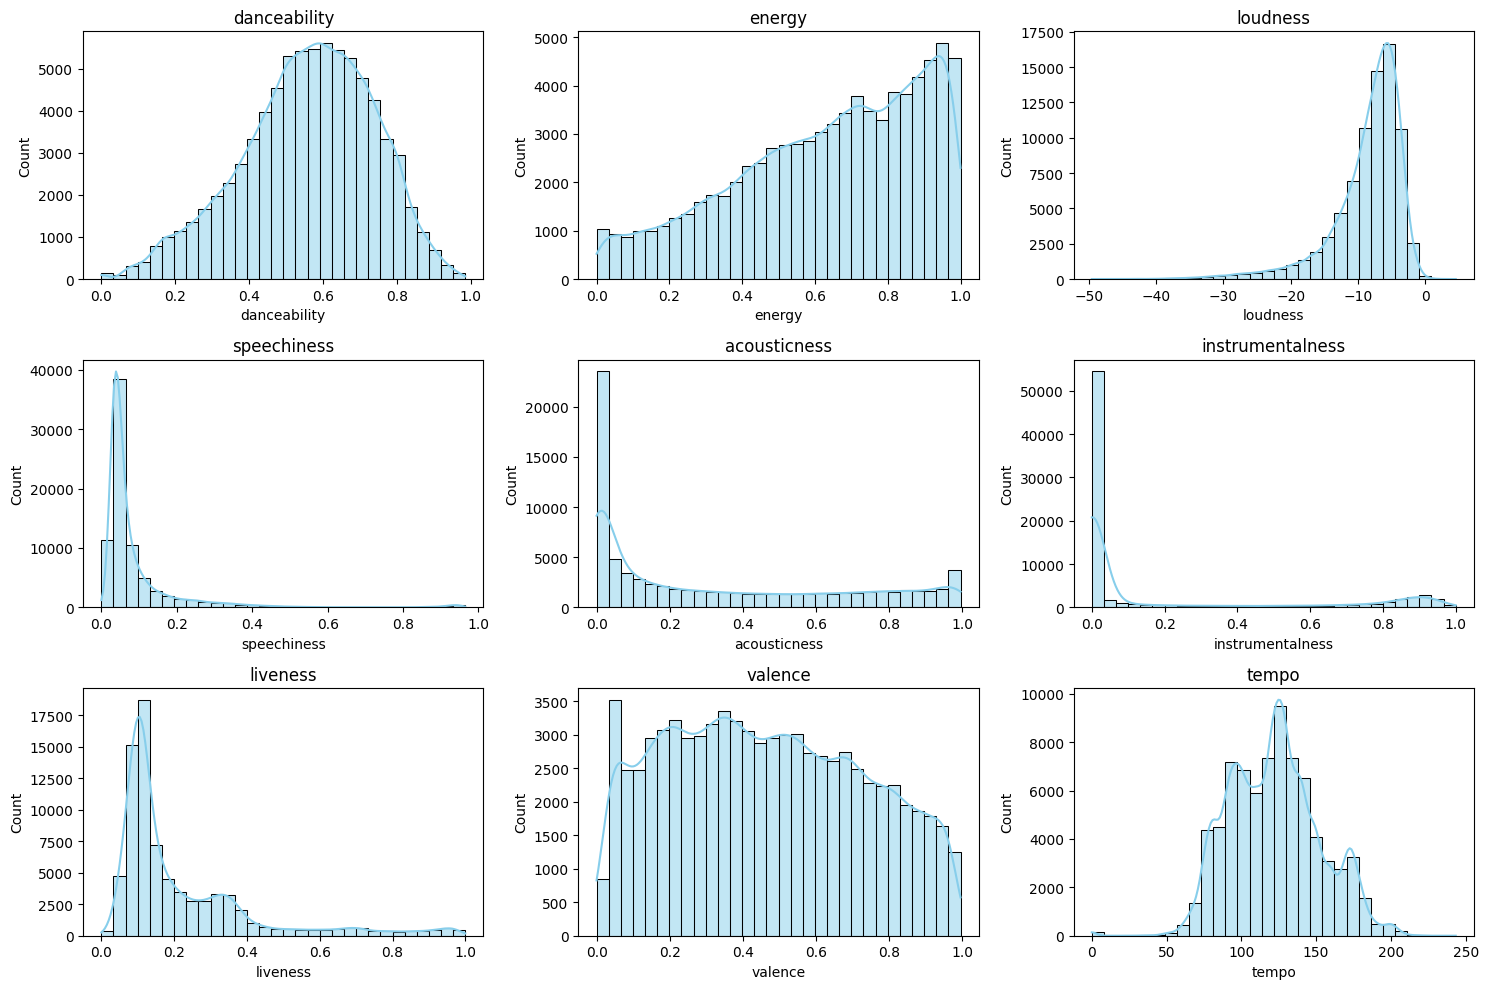

In [7]:
# Univariate plots

#----------------Histograms------------------------#

audio_clust.hist(bins = 30,figsize= (15,10))
plt.show()

plt.figure(figsize=(15,10))
for i, col in enumerate(audio_clust.columns):
    plt.subplot(3,3,i+1)          # 3x3 grid for 9 features
    sns.histplot(audio_clust[col], bins=30, kde=True, color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.savefig(f"{PROJECT_ROOT}/figures/univariate_histograms.png")
plt.show()






H1: Users can be grouped based on preferred danceability and energy

H2: Acousticness and instrumentalness can define niche playlists for specific tastes.

H3: Speechiness separates vocal vs rap-heavy track preferences.

H4: Tempo and valence can define mood-based recommendations.

H5: Liveness and loudness help differentiate studio vs live preferences.

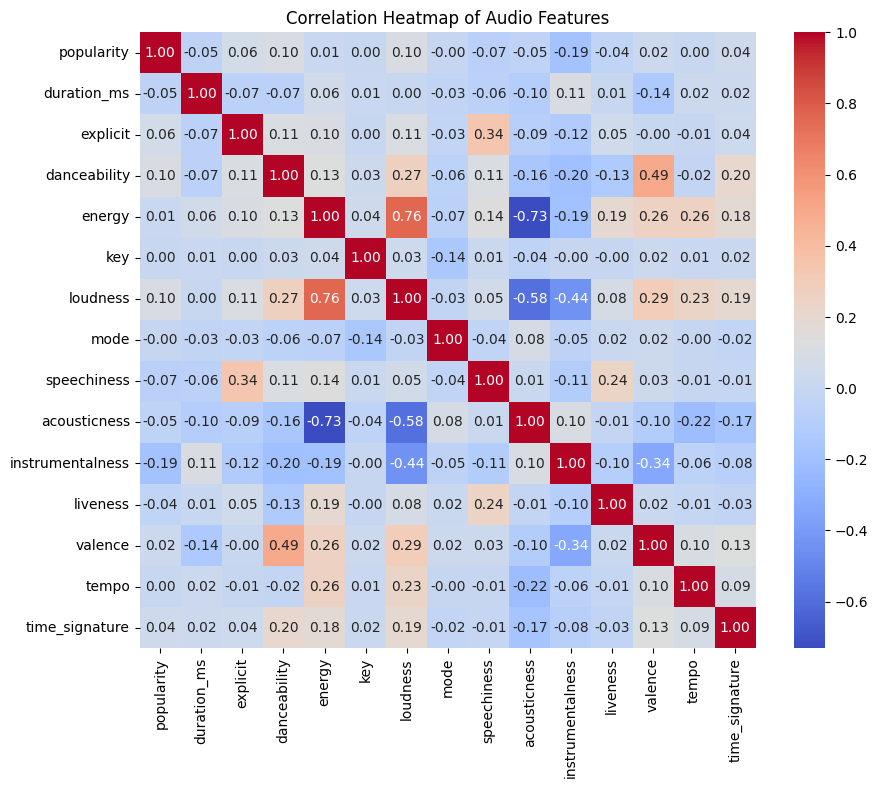

In [8]:
# correlation heatmap
plt.figure(figsize=(10,8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Audio Features')
plt.savefig(f"{PROJECT_ROOT}/figures/correlation_heatmap.png")
plt.show()
